<a href="https://colab.research.google.com/github/Rivaldolim/Dm-3/blob/main/Data_Preperation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Pencetak Gol Teratas Berdasarkan Liga Menggunakan Supervised Learning**

> Indented block



#**Import Library**

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Algoritma C4.5
from sklearn.preprocessing import StandardScaler

#**BUSINESS UNDERSTANDING**


##**Business Objective**

Klub sepak bola dapat menggunakan analisis ini untuk membuat keputusan yang lebih baik di pasar transfer. Mereka dapat memprioritaskan pemain yang memiliki catatan gol terbaik di liga-liga utama, berdasarkan kebutuhan posisi dan gaya permainan tim mereka.


##**Assess Situation**

Klub sepak bola sering kali dihadapkan pada keputusan yang sulit di pasar transfer, terutama terkait dengan pengeluaran dana yang signifikan untuk pemain baru. Dengan menggunakan data pencetak gol teratas, klub dapat membuat keputusan yang lebih terinformasi untuk menginvestasikan sumber daya mereka dengan bijak.

##**Data Mining Goals**

Data mining dapat digunakan untuk melakukan segmentasi pemain berdasarkan profil kinerja mereka. Misalnya, pemain dapat dikelompokkan berdasarkan usia, posisi di lapangan, atau gaya permainan, dan kemudian pola kinerja mereka dapat dianalisis di dalam setiap segmen.


##**Project Plan**

Rencana dari proyek ini adalah Menganalisis kinerja pencetak gol teratas untuk mendapatkan wawasan tentang tren dan faktor-faktor yang memengaruhi produktivitas mereka.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Jelaskan darimana sumber data kalian di sini, sertakan linknya juga ya

In [68]:
df = pd.read_csv("https://raw.githubusercontent.com/Rivaldolim/Dm-3/main/Data%20Cleaning.csv")
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


##**Describe Data**

####Informasi Dasar

In [29]:
print('Jumlah baris = ', df.shape[0])
print('Jumlah kolom = ', df.shape[1])

Jumlah baris =  660
Jumlah kolom =  15


Disini Jumblah baris data memiliki = 660 baris
Jumlah kolom yang tercamtum pada data saya adalah = 15 kolom

####Informasi Lanjutan

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  660 non-null    object 
 1   League                   660 non-null    object 
 2   Club                     660 non-null    object 
 3   Player Names             660 non-null    object 
 4   Matches_Played           660 non-null    int64  
 5   Substitution             660 non-null    int64  
 6   Mins                     660 non-null    int64  
 7   Goals                    660 non-null    int64  
 8   xG                       660 non-null    float64
 9   xG Per Avg Match         660 non-null    float64
 10  Shots                    660 non-null    int64  
 11  OnTarget                 660 non-null    int64  
 12  Shots Per Avg Match      660 non-null    float64
 13  On Target Per Avg Match  660 non-null    float64
 14  Year                     6

1. Country: Nama negara tempat klub berada.
2. League: Nama liga tempat klub berkompetisi.
3. Club: Nama klub sepak bola.
4. Player Names: Nama pemain sepak bola.
5. Matches_Played: Jumlah pertandingan yang dimainkan oleh pemain.
6. Substitution: Jumlah substitusi yang dilakukan oleh pemain.
7. Mins: Total menit yang dimainkan oleh pemain.
8. Goals: Jumlah gol yang dicetak oleh pemain.
9. xG: Expected Goals (xG) adalah perkiraan kemungkinan suatu tembakan menjadi gol berdasarkan faktor-faktor seperti posisi tembakan, tekanan lawan, dll.
10. xG Per Avg Match: Rata-rata Expected Goals (xG) per pertandingan.
11. Shots: Jumlah tembakan yang dilakukan oleh pemain.
12. OnTarget: Jumlah tembakan yang tepat sasaran.
13. Shots Per Avg Match: Rata-rata jumlah tembakan per pertandingan.
14. On Target Per Avg Match: Rata-rata jumlah tembakan yang tepat sasaran per pertandingan.
15. Year: Tahun data tersebut dikumpulkan.


####Informasi Statistik Deskriptif

In [31]:
df.describe()

,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,22.371212,3.224242,2071.416667,11.784848,10.089606,0.476167,64.177273,28.365152,2.948015,1.315652,2018.363636
std,9.754658,3.839498,900.595049,5.982454,5.724844,0.192831,34.941622,16.363149,0.914906,0.474239,1.367700
min,2.000000,0.000000,264.000000,2.000000,0.710000,0.070000,5.000000,2.000000,0.800000,0.240000,2016.000000
25%,14.000000,0.000000,1363.500000,8.000000,6.100000,0.340000,37.750000,17.000000,2.335000,0.980000,2017.000000
50%,24.000000,2.000000,2245.500000,11.000000,9.285000,0.435000,62.000000,26.000000,2.845000,1.250000,2019.000000
75%,31.000000,5.000000,2822.000000,14.000000,13.252500,0.570000,86.000000,37.000000,3.382500,1.540000,2019.000000
max,38.000000,26.000000,4177.000000,37.000000,32.540000,1.350000,208.000000,102.000000,7.200000,3.630000,2020.000000


   1. Count: Jumlah entri non-null dalam kolom. Semua kolom memiliki 660 entri, yang menunjukkan tidak ada nilai null dalam dataset.

   2. Mean: Rata-rata nilai dalam kolom. Misalnya, rata-rata dari 'Matches_Played' adalah sekitar 22.37.

   3. Std: Standar deviasi, yang mengukur seberapa tersebarnya nilai-nilai dalam kolom dari rata-ratanya. Semakin tinggi nilai standar deviasi, semakin tersebarnya data dari rata-rata. Misalnya, standar deviasi dari 'Matches_Played' adalah sekitar 9.75.

   4. Min: Nilai minimum dalam kolom. Misalnya, nilai minimum dari 'Matches_Played' adalah 2.

   5. 25%: Kuartil pertama (Q1) atau nilai yang membagi 25% data terendah. Misalnya, Q1 dari 'Matches_Played' adalah 14, yang berarti 25% data pertama memiliki nilai di bawah 14.  

   6. 50%: Kuartil kedua (Q2) atau median, yang merupakan nilai tengah dari dataset ketika diurutkan secara terurut. Misalnya, median dari 'Matches_Played' adalah 24.

   7. 75%: Kuartil ketiga (Q3) atau nilai yang membagi 75% data terendah. Misalnya, Q3 dari 'Matches_Played' adalah 31, yang berarti 75% data pertama memiliki nilai di bawah 31.

   8. Max: Nilai maksimum dalam kolom. Misalnya, nilai maksimum dari 'Matches_Played' adalah 38.

##**Exploratory Data Analysis**

In [32]:
my_cols = ['Country', 'League', 'Club', 'Player Names',
           'Matches_Played', 'Goals', 'xG', 'Year']

In [33]:


my_df = df[my_cols]



In [34]:


top_3_in_spain = my_df[my_df["Country"]=="Spain"].\
                    sort_values(["Year", "Goals"], ascending=[True, False]).\
                    groupby(["Year"]).head(3)



<Axes: xlabel='Year', ylabel='Goals'>

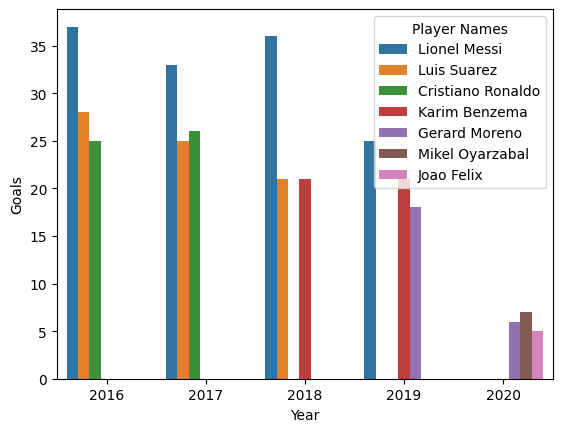

In [35]:
sns.barplot(top_3_in_spain, x='Year', y='Goals', hue='Player Names')

Data diatas menjelaskan tentang banyak gol dari pemian bola dari tahun 2016-2020:
1. Messi
2. Luis suares
3. Cristian ronaldo
4. Karim benzema
5. Gerad moreno
6. Mike oyarzabal
7. Joao felix



TAMBAHKAN VISUALISASI KORELASI BESERTA PENJELASANNYA LEBIH BAIK

##**Verify Data Quality**

####Missing Values

In [36]:
missing_values = df.isnull().sum()
print (missing_values)

Country                    0
League                     0
Club                       0
Player Names               0
Matches_Played             0
Substitution               0
Mins                       0
Goals                      0
xG                         0
xG Per Avg Match           0
Shots                      0
OnTarget                   0
Shots Per Avg Match        0
On Target Per Avg Match    0
Year                       0
dtype: int64


    1. Country: Tidak ada nilai null.
    2. League: Tidak ada nilai null.
    3. Club: Tidak ada nilai null.
    4. Player Names: Tidak ada nilai null.
    5. Matches_Played: Tidak ada nilai null.
    6. Substitution: Tidak ada nilai null.
    7. Mins: Tidak ada nilai null.
    8. Goals: Tidak ada nilai null.
    9. xG: Tidak ada nilai null.
    10. xG Per Avg Match: Tidak ada nilai null.
    11. 1Shots: Tidak ada nilai null.
    12. OnTarget: Tidak ada nilai null.
    13. Shots Per Avg Match: Tidak ada nilai null.
    14. On Target Per Avg Match: Tidak ada nilai null.
    15. Year: Tidak ada nilai null.

####Outliers Values

In [37]:
#Tambahkan kode untuk mengecek apakah ada outliers pada tiap kolom di dataset kalian ya

Jangan lupa juga untuk berikan penjelasan di sini (baik ada outliers maupun gak ada nilai outliersnya)

####Duplicated Values

In [38]:
print("Total Duplication: ", df.duplicated().sum())

Total Duplication:  0


Tidak ada data duplikat

####Inconsistent Values / Noise (Optional)

In [39]:
#Tambahkan kode untuk mengecek apakah ada nilai inkosisten/noise pada tiap kolom di dataset kalian ya (OPSIONAL)

Jangan lupa juga untuk berikan penjelasan di sini (OPSIONAL)

## **DATA PREPARATION**

###**DATA Cleaning**

####**Penanganan Duplicated Values**

####**Penanganan Outliers**

In [40]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)
display(results_df)

Kolom,Persentase Outliers
Matches_Played,0.000000
Substitution,3.030303
Mins,0.000000
Goals,4.848485
xG,2.878788
xG Per Avg Match,3.333333
Shots,1.666667
OnTarget,3.030303
Shots Per Avg Match,3.333333
On Target Per Avg Match,3.636364


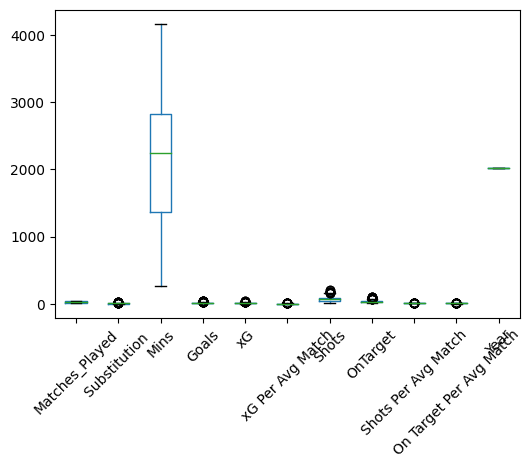

In [41]:
boxplot = df.boxplot(grid=False, rot=45, showfliers=True, figsize=(6, 4))

Dari data yang diatas pengecekan outliers dan hasil visualisasi yang dilakukan , dapat disimpulkan bahwa tidak ada data outliers dalam dataset yang digunkan

In [42]:
[print(f"kolom -> {col}\n{df[col].unique()}\n{'=' *30}\n") for col in df.columns]

kolom -> Country
['Spain' 'Italy' 'Germany' 'England' 'Brazil' 'France' 'USA' 'Portugal '
 ' Netherlands']

kolom -> League
['La Liga' 'Serie A' 'Bundesliga' 'Premier League'
 'Campeonato Brasileiro SÃ©rie A' 'France Ligue 11' 'France Ligue 20'
 'France Ligue 2' 'France Ligue 12' 'France Ligue 9' 'France Ligue 15'
 'France Ligue 6' 'France Ligue 3' 'France Ligue 16' 'France Ligue 14'
 'France Ligue 4' 'France Ligue 1' 'France Ligue 10' 'France Ligue 7'
 'France Ligue 13' 'France Ligue 8' 'France Ligue 5' 'France Ligue 19'
 'France Ligue 18' 'France Ligue 17' 'MLS' 'Primeira Liga' 'Eredivisie']

kolom -> Club
['(BET)' '(BAR)' '(ATL)' '(CAR)' '(VAL)' '(JUV)' '(RMA)' '(PSG)' '(CEL)'
 '(EIB)' 'None' '(HUE)' '(VIL)' '(MON)' '(SOC)' 'Florin' '(LIV)' '(SAS)'
 '(LAZ)' '(VER)' '(NAP)' '(ATA)' '(FIO)' '(BEN)' '(CAG)' '(CRZ)' 'Cyril'
 '(ROM)' '(SAM)' 'Marco' '(IMI)' '(TOR)' '(HKI)' '(BMG)' '(BAY)' 'Sandro'
 '(HOF)' '(FCA)' '(RBL)' '(CHE)' '(SCF)' '(SCH)' '(WOB)' '(MAI)' '(ARS)'
 '(STP)' '(UNB)' '

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

####**Imputasi Outliers**

In [43]:
Q1 = df['Goals'].quantile(0.25)
Q3 = df['Goals'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['Goals']=np.where(df['Goals']>upper_whisker,upper_whisker,np.where(df['Goals']<lower_whisker,lower_whisker,df['Goals']))

In [44]:
Q1 = df['OnTarget'].quantile(0.25)
Q3 = df['OnTarget'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['OnTarget']=np.where(df['OnTarget']>upper_whisker,upper_whisker,np.where(df['OnTarget']<lower_whisker,lower_whisker,df['OnTarget']))

###**Pengecekan Ulang**

In [45]:
esults = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Matches_Played,0.000000
Substitution,3.030303
Mins,0.000000
Goals,4.848485
xG,2.878788
xG Per Avg Match,3.333333
Shots,1.666667
OnTarget,3.030303
Shots Per Avg Match,3.333333
On Target Per Avg Match,3.636364


Penjelasan disiini saya mengubah Goals menjadi 0% dan On Target

###**Construct Data**

####**Melakukan Rekayasan Fitur (Feature Engineering)**

In [60]:
df = pd.DataFrame({'year': [2015, 2016, 2017, 2018, 2019, 2020]})

def categorize_year(year):
    if 2016 <= year < 2018:
        return 'Messi'
    elif 2019 <= year < 2020:
        return 'Ronaldo'
    else:
        return 'Benzema'

df['year Category'] = df['year'].apply(categorize_year)
print(df)


   year year Category
0  2015       Benzema
1  2016         Messi
2  2017         Messi
3  2018       Benzema
4  2019       Ronaldo
5  2020       Benzema


####**Pengecekan Hasil**

In [47]:
df.head()

,year,year Category
0,2015,Elderly
1,2016,Teenagers
2,2017,Teenagers
3,2018,Elderly
4,2019,Adult


###**DATA REDUCATION**

####**Mengurangi Fitur-Fitur Yang Kurang Relawan**

In [48]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr, color_continuous_scale='YlGnBu_r')

In [61]:
df

,year,year Category
0,2015,Benzema
1,2016,Messi
2,2017,Messi
3,2018,Benzema
4,2019,Ronaldo
5,2020,Benzema


In [64]:
df.drop(['OnTarget'], axis=1,inplace=True)
df.head()



KeyError: "['OnTarget'] not found in axis"

###**Data Tranformasi**

####**Mapping**

####**Ecoding**

In [51]:
df= pd.get_dummies(df)

####**Pengecekan Hasil**